In [548]:
import pandas as pd

In [549]:
df = pd.read_csv('QueryResults.csv', names=['DATE', 'TAGS', 'POSTS'], header=0)

In [550]:
df.head()

,DATE,TAGS,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [551]:
df.isna().sum()

DATE     0
TAGS     0
POSTS    0
dtype: int64

In [552]:
df.shape

(1991, 3)

In [553]:
df.TAGS.unique()

array(['c#', 'assembly', 'javascript', 'c', 'python', 'perl', 'c++',
       'java', 'delphi', 'ruby', 'php', 'r', 'swift', 'go'], dtype=object)

In [554]:
## can you figure out how to count the number of posts per language?

In [555]:
number_post_by_tags = df[['TAGS', 'POSTS']].groupby(['TAGS'])
number_post_by_tags.sum()

,POSTS
TAGS,
assembly,34852
c,336042
c#,1423530
c++,684210
delphi,46212
go,47499
java,1696403
javascript,2056510
perl,65286


In [556]:
## Can you count how many months of posts exist for each programming language?

In [557]:
number_post_by_tags.count()

,POSTS
TAGS,
assembly,144
c,144
c#,145
c++,144
delphi,144
go,129
java,144
javascript,144
perl,144


In [558]:
## Which programming language had the most number of posts since the creation of Stack Overflow?

In [559]:
number_post_by_tags.sum().idxmax()

POSTS    javascript
dtype: object

In [560]:
## Data Cleaning

In [561]:
df.DATE = pd.to_datetime(df.DATE)

In [562]:
df.head()

,DATE,TAGS,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


In [563]:
## pivot

In [564]:
reshaped_df = df.pivot(index='DATE', columns='TAGS', values='POSTS')
reshaped_df.head()

TAGS,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


In [565]:
reshaped_df.shape

(145, 14)

In [566]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAGS')

In [567]:
reshaped_df.isna().sum()

TAGS
assembly       1
c              1
c#             0
c++            1
delphi         1
go            16
java           1
javascript     1
perl           1
php            1
python         1
r              3
ruby           1
swift         10
dtype: int64

In [568]:
reshaped_df.count()

TAGS
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
dtype: int64

In [569]:
reshaped_df.fillna(0, inplace=True)

In [570]:
reshaped_df.isna().any()

TAGS
assembly      False
c             False
c#            False
c++           False
delphi        False
go            False
java          False
javascript    False
perl          False
php           False
python        False
r             False
ruby          False
swift         False
dtype: bool

## Data Visualization

In [571]:
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

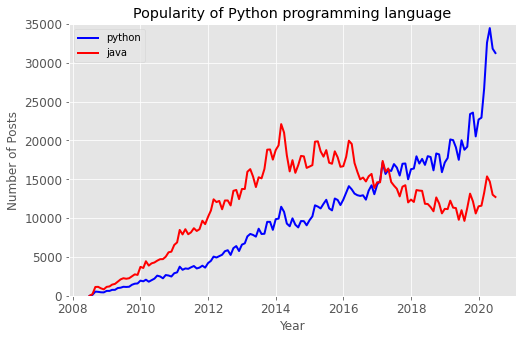

In [572]:
style.use('ggplot')
plt.figure(figsize=(8,5)) 

plt.title('Popularity of Python programming language')
plt.xlabel('Year')
plt.ylabel('Number of Posts')


plt.ylim(0, 35000)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.plot(reshaped_df.index, reshaped_df['python'], 'b', linestyle='-', linewidth=2, markersize=12, label='python')
plt.plot(reshaped_df.index, reshaped_df['java'], 'r', linestyle='-', linewidth=2, markersize=12, label='java')

plt.legend()

plt.show()

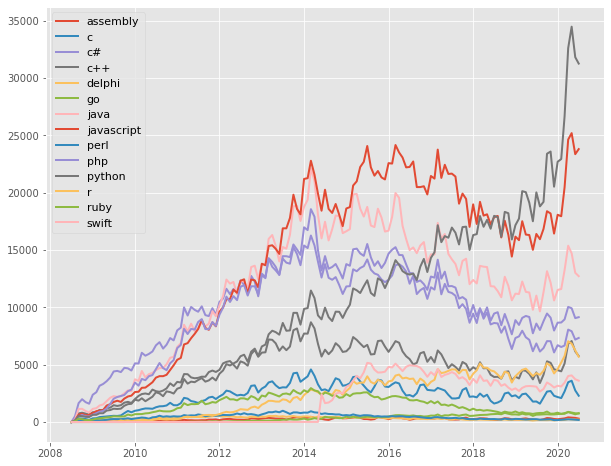

In [573]:
plt.figure(figsize=(10,8))
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=6).mean()

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], linewidth=2, label=reshaped_df[column].name)

plt.legend(fontsize=11)

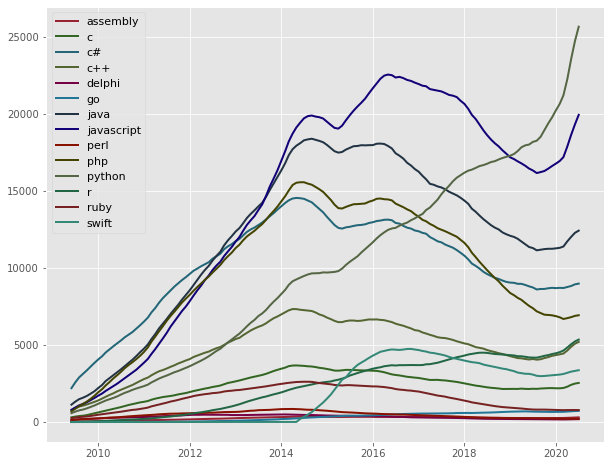

In [575]:
import numpy as np
import random

plt.figure(figsize=(10,8))

color = ''


# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=12).mean()

for column in reshaped_df.columns:
    rgb = (random.randint(0,9), random.randint(0,9), random.randint(0,9)) 
    for i in rgb:
        color += str(i)
        
    plt.plot(roll_df.index, roll_df[column], color=f'#{color}', linewidth=2, label=reshaped_df[column].name)
    color = ''
plt.legend(fontsize=11)